In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import math
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [3]:
def get_stock_data(acronym):
    df = yf.download(acronym,'2012-12-15','2020-05-26', interval='1d') 
    return df

In [4]:
df = get_stock_data('TSLA')
netflix = get_stock_data('NFLX')
amazon = get_stock_data('YELP')
nike = get_stock_data('AMZN')
starbucks = get_stock_data('SBUX')
yelp = get_stock_data('NKE')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
df.reset_index(inplace = True)

In [6]:
dates = np.array(df.Date)

In [9]:
tesla = df.filter(['Open'])

In [10]:
tesla = tesla['Open'].values
netflix = netflix['Open'].values
amazon = amazon['Open'].values
nike = nike['Open'].values
starbucks = starbucks['Open'].values
yelp = yelp['Open'].values

In [11]:
training_data_len = math.ceil(len(tesla)*0.8)
tesla = tesla.reshape(-1,1)

In [12]:
dates_training = dates[:training_data_len]
dates_validation = dates[training_data_len:]

In [13]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(tesla)

In [14]:
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[:training_data_len,:]

#split the data into X_train and y_train dataset
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(X_train)
        print(y_train)
        print()

[array([8.75911038e-04, 8.64683277e-04, 1.41493354e-03, 1.96518810e-03,
       1.69567470e-03, 1.05558521e-03, 7.18696676e-04, 1.07804501e-03,
       5.61482313e-04, 4.26727758e-04, 0.00000000e+00, 2.24592925e-03,
       2.44806323e-03, 2.02133547e-03, 2.02133547e-03, 1.68444694e-03,
       1.13419239e-03, 9.76978026e-04, 1.16788424e-03, 8.98392263e-05,
       1.23526794e-04, 9.54518219e-04, 1.30263880e-03, 1.95396034e-03,
       1.75182636e-03, 2.26838906e-03, 3.36889388e-03, 4.49185851e-03,
       4.33464414e-03, 5.72711788e-03, 5.44637673e-03, 5.46883653e-03,
       5.80572506e-03, 6.06401070e-03, 5.61482313e-03, 5.81695711e-03,
       6.95114950e-03, 7.24312270e-03, 5.59236333e-03, 6.12015807e-03,
       5.95171166e-03, 6.33351981e-03, 6.17630545e-03, 4.89612646e-03,
       7.07467629e-03, 3.91914843e-03, 3.05446516e-03, 3.53734029e-03,
       1.63952733e-03, 1.58337995e-03, 3.24536709e-03, 2.24592925e-03,
       1.98764790e-03, 3.36889388e-03, 4.50308627e-03, 5.31162217e-03,
     

In [15]:
#Convert the x_train and y_train to numpy arrays

In [16]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [17]:
#Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))


In [18]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [19]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
#Train the model
model.fit(X_train, y_train, batch_size = 1, epochs = 1)

Epoch 1/1
1438/1438 [==============================] - 83s 57ms/step - loss: 6.5346e-04


In [21]:
#Create the testing dataset
#Create a new array containing scaled values from index(training_lenght to end)
test_data = scaled_data[training_data_len - 60: , :]
X_test = []
y_test = tesla[training_data_len: , : ]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

In [22]:
#Convert the data to a numpy array
X_test = np.array(X_test)

In [23]:
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [24]:
#Get the models predicted price values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

In [25]:
predictions

array([[334.3072 ],
       [332.55557],
       [332.40982],
       [333.26318],
       [333.8985 ],
       [336.66458],
       [339.64404],
       [342.366  ],
       [346.24683],
       [349.03387],
       [352.16806],
       [354.95932],
       [357.2844 ],
       [359.65842],
       [360.0446 ],
       [357.9059 ],
       [353.10513],
       [346.24585],
       [338.0351 ],
       [329.75305],
       [320.87418],
       [315.38632],
       [312.78522],
       [313.9217 ],
       [312.94034],
       [311.21365],
       [309.2093 ],
       [309.29367],
       [312.96936],
       [317.22488],
       [321.12372],
       [325.2855 ],
       [329.03845],
       [331.13245],
       [333.30658],
       [335.356  ],
       [334.11172],
       [329.06934],
       [321.1912 ],
       [311.70602],
       [304.0437 ],
       [298.13486],
       [294.24265],
       [292.5836 ],
       [292.40906],
       [293.61813],
       [296.3514 ],
       [299.4776 ],
       [303.30008],
       [306.19437],


In [26]:
#Get the roor mean squared error (RMSE)
rmse= np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

45.76643250595245

In [36]:
print(len(dates_validation))
print(len(predictions))
print(len(tesla[training_data_len:]))
print(tesla[training_data_len:].shape)
print(predictions.shape)
print(dates_validation.shape)

374
374
374
(374, 1)


AttributeError: 'list' object has no attribute 'shape'

In [37]:
predictions = [i for lst in predictions for i in lst]

TypeError: 'numpy.float32' object is not iterable

In [39]:
tests = [i for lst in tesla[:training_data_len] for i in lst]

In [40]:
validation = [i for lst in tesla[training_data_len:] for i in lst]

In [ ]:
dates_train =  [i for lst in dates_training for i in lst]


In [42]:
df_t = pd.DataFrame({'Date': dates_training, 'Training':tests})
df_t.set_index('Date', inplace=True)
df_vp = pd.DataFrame({'Date':dates_validation, 'Validation':validation, 'Prediction':predictions})
df_vp.set_index('Date', inplace=True)
merged_shit = pd.concat([df_t, df_vp])
merged_shit.head()

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,Prediction,Training,Validation
Date,,,
2012-12-14,NaN,33.779999,NaN
2012-12-17,NaN,33.770000,NaN
2012-12-18,NaN,34.259998,NaN
2012-12-19,NaN,34.750000,NaN
2012-12-20,NaN,34.509998,NaN


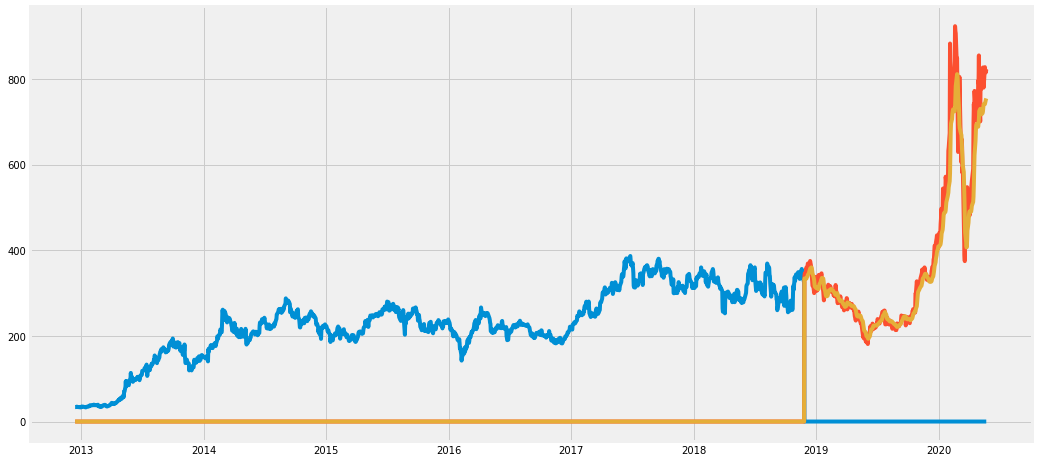

In [58]:
plt.figure(figsize=(16,8))
plt.plot(merged_shit.Training)
plt.plot(merged_shit.Validation)
plt.plot(merged_shit.Prediction)
merged_shit = merged_shit.fillna(value=0)
merged_shit = merged_shit[['Prediction', 'Training', 'Validation']].apply(lambda x:(round(x,2)))
merged_shit.to_csv('../02 CSV_files/predictions/tesla_predictions.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1872 entries, 2012-12-14 to 2020-05-22
Data columns (total 3 columns):
Prediction    1872 non-null float64
Training      1872 non-null float64
Validation    1872 non-null float64
dtypes: float64(3)
memory usage: 58.5 KB


In [51]:
merged_shit

,Prediction,Training,Validation
Date,,,
2012-12-14,0.000000,33.779999,0.000000
2012-12-17,0.000000,33.770000,0.000000
2012-12-18,0.000000,34.259998,0.000000
2012-12-19,0.000000,34.750000,0.000000
2012-12-20,0.000000,34.509998,0.000000
...,...,...,...
2020-05-18,741.504578,0.000000,827.780029
2020-05-19,745.488586,0.000000,815.169983
2020-05-20,748.880066,0.000000,820.500000


C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location ' lower right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


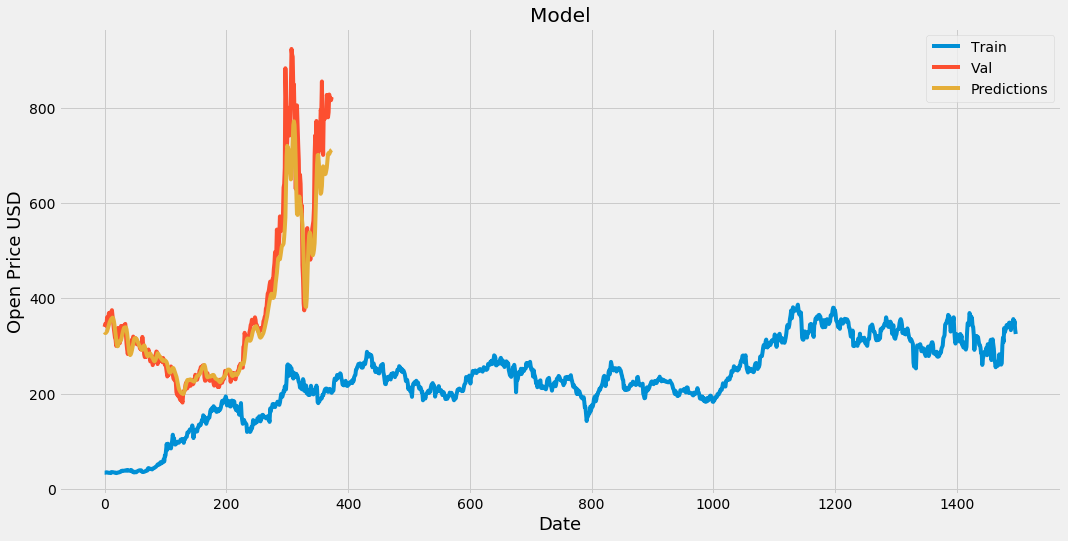

In [96]:
train = pd.DataFrame(tesla[:training_data_len])
valid = pd.DataFrame(tesla[training_data_len:])
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Open Price USD', fontsize = 18)
plt.plot(train[0])
plt.plot(valid[[0, 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = ' lower right')
plt.show()